In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


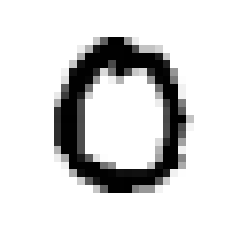

In [5]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[3600]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
y[3600]

0.0

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [12]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
shuffle_index

array([ 4256, 35345, 32763, ..., 15791, 37665, 24177])

In [15]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)
print(y_train_0)
print(y_test_0)

[False False False ... False False False]
[ True  True  True ... False False False]


In [17]:
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring='accuracy')

array([0.98630068, 0.9878    , 0.98779939])

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False])

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_0, y_train_pred)

array([[53749,   328],
       [  434,  5489]])

#### **Precision and Recall**

$precision = \frac{TP}{TP + FP}$

$recall = \frac{TP}{TP + FN}$

In [32]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_0, y_train_pred)
recall = recall_score(y_train_0, y_train_pred)
print('Precision:', precision, 5489 / (5489 + 328))      # == TP / (TP + FP)
print('Recall:', recall, 5489 / (5489 + 434))            # == TP / (TP + FN)

Precision: 0.9436135465016331 0.9436135465016331
Recall: 0.9267263211210536 0.9267263211210536


#### **$F_{1}$ score - harmonic mean**

$F_{1}=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=2*\frac{precision*recall}{precision+recall}=\frac{TP}{TP+\frac{FN+FP}{2}}$

In [36]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_0, y_train_pred)
print('sklearn f1_score:', f1)
print('counted f1_score:', 5489 / (5489 + (328 + 434) / 2))

sklearn f1_score: 0.9350936967632028
counted f1_score: 0.9350936967632028


In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method="decision_function")
y_scores

array([-90211.77897345, -89651.06014927, -25186.11535893, ...,
       -52599.89837336, -63900.41945006, -20723.05623972])

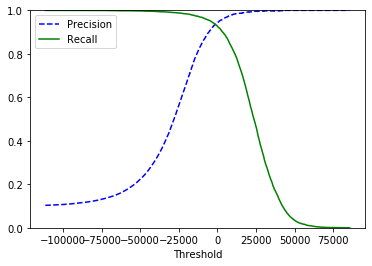

In [41]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

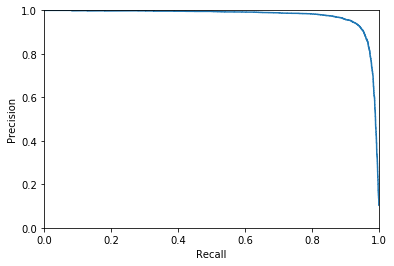

In [46]:
def plot_precision_vs_recall(precisions, recall):
        plt.plot(recalls, precisions)
        plt.xlabel("Recall")
        plt.ylabel('Precision')
        plt.axis([0, 1, 0, 1])

plot_precision_vs_recall(precisions, recalls)
plt.show()

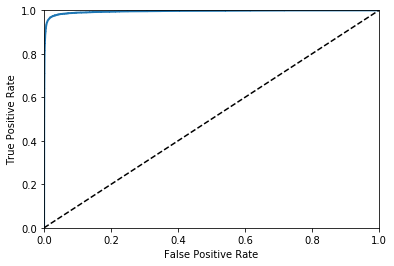

Area under the curve: 0.9947676800089127


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

print('Area under the curve:', roc_auc_score(y_train_0, y_scores))